# Effects of Different Environmental Attributes on Daily Bike Rentals
## by *George Samir Fahmy*

## Investigation Overview

The main focus of this investigation was to look at charactristics affecting daily bike rentals, mainly feeling temperature, humidity, windspeed, season and weather situation.

## Dataset Overview

The data consists of the daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information. An updated dataset was generated from the raw data to provide for better clarity, as well as removing a single entry that showed a physical impossibility.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_pickle('day_update.pkl')

In [3]:
# set seasons order
ordered_seasons = pd.api.types.CategoricalDtype(ordered=True, categories=['Spring', 'Summer', 'Fall', 'Winter'])
df['season'] = df['season'].astype(ordered_seasons)

# set weekdays order
ordered_weekdays = pd.api.types.CategoricalDtype(ordered=True, categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df['weekday'] = df['weekday'].astype(ordered_weekdays)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Daily Bike Rentals

The bike rentals shows values ranging from 0, uptil 8k rentals per day. A histogram plot of the data shows a normal distribution.

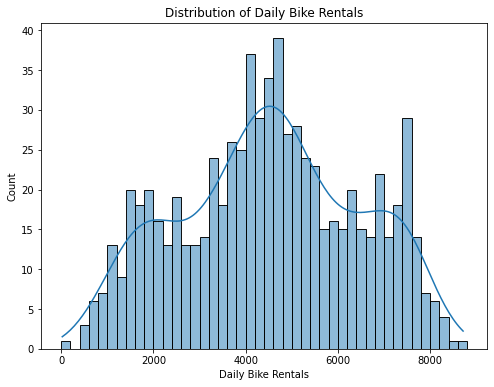

In [4]:
plt.figure(figsize=[8, 6])
sb.histplot(data=df, x='bike_rentals', kde=True, bins=np.arange(0, df['bike_rentals'].max() + 2e2, 2e2));
plt.xlabel('Daily Bike Rentals')
plt.title('Distribution of Daily Bike Rentals');

## Effect of Feeling Temperature on Bike Rentals

An approximately linear relationship can be observed between the feeling temperature and the number of bike rentals.

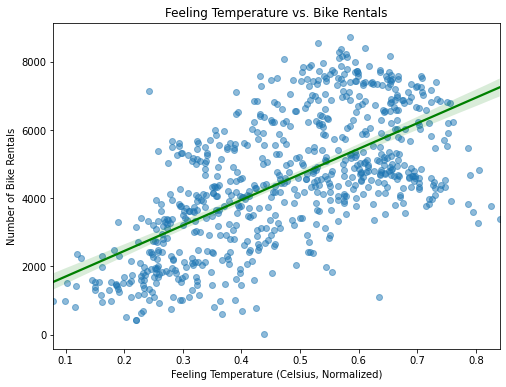

In [5]:
plt.figure(figsize=[8, 6])
sb.regplot(data=df, x='feeling_temperature', y='bike_rentals', scatter_kws={'alpha':0.5}, line_kws={'color':'Green'})
plt.xlabel('Feeling Temperature (Celsius, Normalized)')
plt.ylabel('Number of Bike Rentals')
plt.title('Feeling Temperature vs. Bike Rentals');

## Effect of Weekday on Bike Rentals

An unexpected observation is the fact that weekdays had no significant effect on the number of bike rentals. Meaning similar likelihood of renting a bike during a working day or a holiday/weekend.

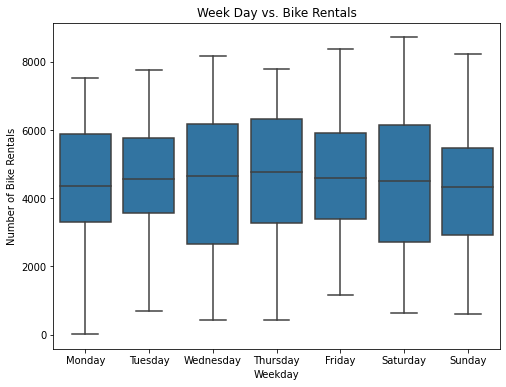

In [6]:
plt.figure(figsize=[8, 6])
sb.boxplot(data=df, x='weekday', y='bike_rentals', color=sb.color_palette()[0])
plt.xlabel('Weekday')
plt.ylabel('Number of Bike Rentals')
plt.title('Week Day vs. Bike Rentals');

## Bike Rental Best Conditions

Investigating the best environmental conditions that lead to higher bike rentals, it is observed that Fall season and a weather situation index of 1 (meaning clear to partialy cloudy sky) has the highest caused a significant surge in bike rentals.

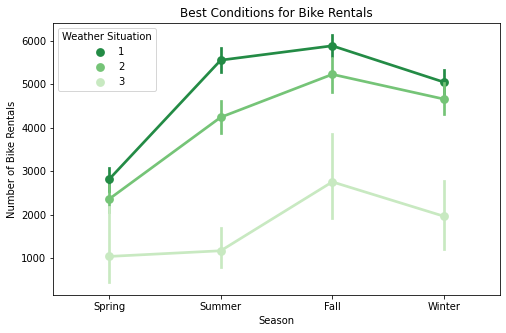

In [7]:
plt.figure(figsize=[8, 5])
sb.pointplot(data=df, x='season', y='bike_rentals', hue='weather_situation', palette='Greens_r')
plt.xlabel('Season')
plt.ylabel('Number of Bike Rentals')
plt.legend(title='Weather Situation')
plt.title('Best Conditions for Bike Rentals');

## Bike Rental Trends over 2011 and 2012

As explained by the earlier graph, bike rentals tend to peak during the fall season month. This is clearly observed in the graph below.    
However another interesting observation is the jump in bike rentals in 2012 as compared to 2011.

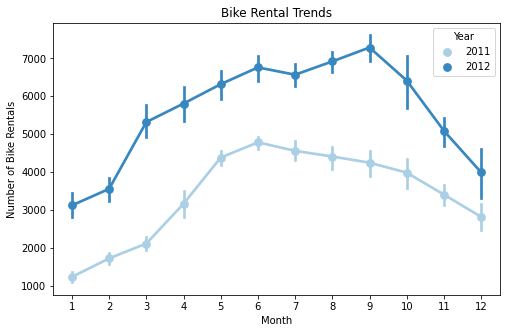

In [8]:
plt.figure(figsize=[8, 5])
sb.pointplot(data=df, x='month', y='bike_rentals', hue='year', palette='Blues')
plt.xlabel('Month')
plt.ylabel('Number of Bike Rentals')
plt.legend(title='Year')
plt.title('Bike Rental Trends');

In [9]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --no-input

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 757648 bytes to slide_deck_template.slides.html
